

*The SIR model describes the change in the population of each of these compartments in terms of two parameters, $\beta$ and $\gamma$*


$\frac{dS}{dt} = -\beta*I*\frac{S}{N}$

$\frac{dI}{dt} = -\beta*I*\frac{S}{N} - \gamma*I$

$\frac{dI}{dt} = \gamma*I$

$\beta$: The infectious rate, controls the rate of spread which represents the probability of transmitting disease between a susceptible and an infectious individual.


$\gamma$ is the mean recovery rate: that is, $\frac{1}{\gamma}$ is the mean period of time during which an infected individual can pass it on.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def derive(y0, t, N, beta, gamma):

    S, I, R = y0
    
    dSdt = -beta*S*I/N

    dIdt = beta*S*I/N -gamma*I

    dRdt = gamma*I

    return dSdt, dIdt, dRdt

In [4]:
N  = 1000

gamma = 1.0/10.0

R0 = 4.7

beta = R0*gamma

S0, I0, R0 = N, 1, 0

t = np.linspace(0, 149, 150)

y0 = S0, I0, R0

ret = odeint(derive, y0, t, args=(N, beta, gamma))

S, R, I = ret.T

In [11]:
def plotSir(t, S, I, R):
    f, ax = plt.subplots(1, 1, figsize=(10, 4))
    ax.plot(t, S, "b", linewidth=2, label="Susceptible")
    ax.plot(t, I, "g", linewidth=2, label="Infected")
    ax.plot(t, R, "r", linewidth=2, label="Recovered")
    ax.plot(t, S+I+R, "y", linewidth=2, label="Total")

    ax.grid(b=True, which="major")

    legend = ax.legend()

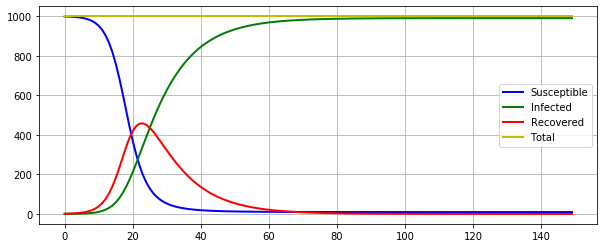

In [12]:
plotSir(t, S, I, R)